<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/tf-dense-insurance-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create your first high level TensorFlow Model

In [1]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# will also work, but nightly build might contain surprises

# !pip install -q tf-nightly-gpu-2.0-preview

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/data/insurance-customers-1500.csv', sep=';')

In [5]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


## Input data now is in X, labels are in y

In [0]:
y = df['group'].values
X = df.drop('group', axis='columns').values

In [7]:
X.shape

(1500, 3)

In [8]:
y.shape

(1500,)

## Create your model here

In [0]:
from tensorflow.keras.layers import Dense, Input

In [0]:
# getting help
Dense?

In [19]:
# this is broken, please fix and add your network here

num_features = 3
num_categories = 3

model = keras.Sequential()

# your model definition goes here

model.summary()

ValueError: ignored

In [0]:
model.fit?

In [13]:
%%time 

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X, y, epochs=500, verbose=0)

W0820 09:25:43.215142 139707860813696 deprecation.py:323] From /tensorflow-2.0.0b1/python3.6/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


CPU times: user 52.3 s, sys: 3.94 s, total: 56.2 s
Wall time: 45.5 s


In [14]:
loss, accuracy = model.evaluate(X, y)
loss, accuracy

1500/1500 [==============================] - 0s 63us/sample - loss: 0.6140 - accuracy: 0.7600


(0.6139737922350565, 0.76)

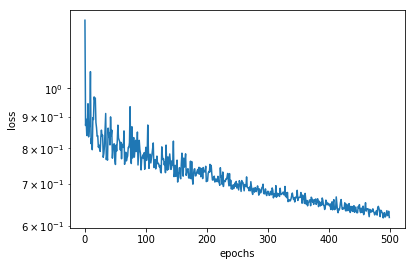

In [15]:
plt.yscale('log')

plt.ylabel("loss")
plt.xlabel("epochs")

plt.plot(history.history['loss'])

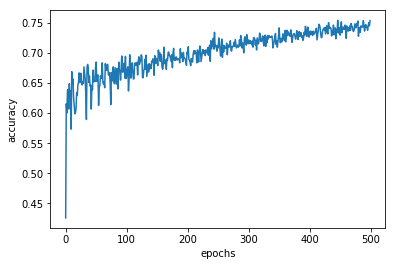

In [16]:
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['accuracy'])

In [17]:
# category 1 should have the highest probability
model.predict(np.array([[100, 48, 10]]))

array([[0.03752092, 0.8885306 , 0.07394835]], dtype=float32)

In [0]:
assert model.predict(np.array([[100, 48, 10]])).argmax() == 1